In [2]:
# here are all the lib that need to be imported:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.patches as mpatches

In [3]:
wine_df = pd.read_csv('/Users/katrin/WineNot/TechLabsDUS_WineNot/data/cleaned/df_wine1.csv')
display(wine_df)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,United States of America,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,United States of America,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,United States of America,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,United States of America,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


The code below creates variable with mean points of wines in each country and then creates a map showing mean points of each country. This helps to compare average quality of wine in each country.

In [4]:
# Calculate the mean quality for each country
mean_points = wine_df.groupby('country')['points'].mean().reset_index()

In [5]:
# Load the world map shapefile (or any other map)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/lk/3s5cmq416qn0bv0jdl9d8g440000gn/T/ipykernel_75629/3771142462.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [6]:
# Merge the world map with the mean quality data
world = world.merge(mean_points, how='left', left_on='name', right_on='country')

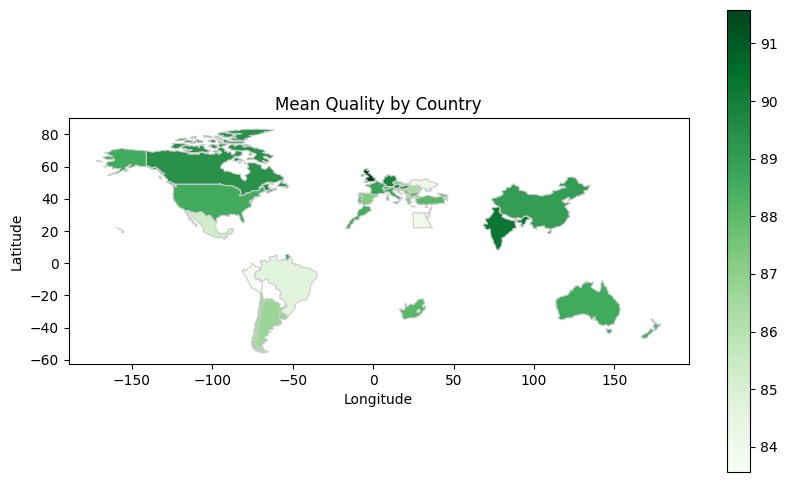

In [7]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(column='points', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
plt.title('Mean Quality by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

After that the same procedure is done but with adding all the countries on the map for better visualisation

In [9]:
# Create a DataFrame containing all areas
all_areas = pd.DataFrame({'country': world['name']})

# Merge the all_areas DataFrame with the mean quality data
merged_df = all_areas.merge(mean_points, how='left', on='country')

# Display the merged DataFrame
print(merged_df)

# Assuming merged_df is your DataFrame with NaN values
merged_df['points'] = merged_df['points'].fillna(0)

# Display the DataFrame after replacing NaN with 0
print(merged_df)

                      country    points
0                        Fiji       NaN
1                    Tanzania       NaN
2                   W. Sahara       NaN
3                      Canada  89.36965
4    United States of America  88.56372
..                        ...       ...
172                    Serbia  87.50000
173                Montenegro       NaN
174                    Kosovo       NaN
175       Trinidad and Tobago       NaN
176                  S. Sudan       NaN

[177 rows x 2 columns]
                      country    points
0                        Fiji   0.00000
1                    Tanzania   0.00000
2                   W. Sahara   0.00000
3                      Canada  89.36965
4    United States of America  88.56372
..                        ...       ...
172                    Serbia  87.50000
173                Montenegro   0.00000
174                    Kosovo   0.00000
175       Trinidad and Tobago   0.00000
176                  S. Sudan   0.00000

[177 rows x 2 c

In [10]:
# Calculate the mean points for each country
mean_points = merged_df.groupby('country')['points'].mean().reset_index()

In [11]:
# Load the world map shapefile (or any other map)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/lk/3s5cmq416qn0bv0jdl9d8g440000gn/T/ipykernel_75629/3771142462.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [12]:
# Merge the world map with the mean points data
world = world.merge(mean_points, how='left', left_on='name', right_on='country')

In [13]:
# Define the minimum and maximum quality values
min_quality = 80
max_quality = world['points'].max()

# Set the colormap
cmap = cm.get_cmap('Greens')

# Normalize the quality values
norm = Normalize(vmin=min_quality, vmax=max_quality)


/var/folders/lk/3s5cmq416qn0bv0jdl9d8g440000gn/T/ipykernel_75629/1836148895.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Greens')


'Map_mean_points.png'

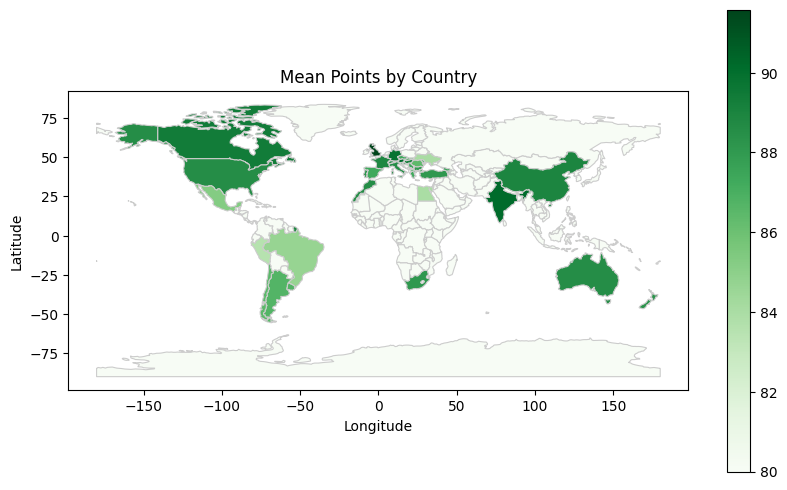

In [14]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(column='points', cmap=cmap, norm=norm, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
plt.title('Mean Points by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.savefig('Map_mean_points.png', format='png', transparent=True)
display('Map_mean_points.png')

In the next plot only the Europe results are presented for a more detailed country analysis. 

The wine could be valued higher because it's just a rare sort, so we see that England has higher points but it also has much less wineries, compared to other Europe countries. So the rate could be subjective, as the sort could have not the best taste, but uncommon one. According to behavioural economic theory, people pay more attention to smth that is not common and stands out. So this could be one of the reasons.

Analysis shows that the the best WIne producers in Europe are UK, Austria and Germany

/var/folders/lk/3s5cmq416qn0bv0jdl9d8g440000gn/T/ipykernel_75629/251923112.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/lk/3s5cmq416qn0bv0jdl9d8g440000gn/T/ipykernel_75629/251923112.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Greens')


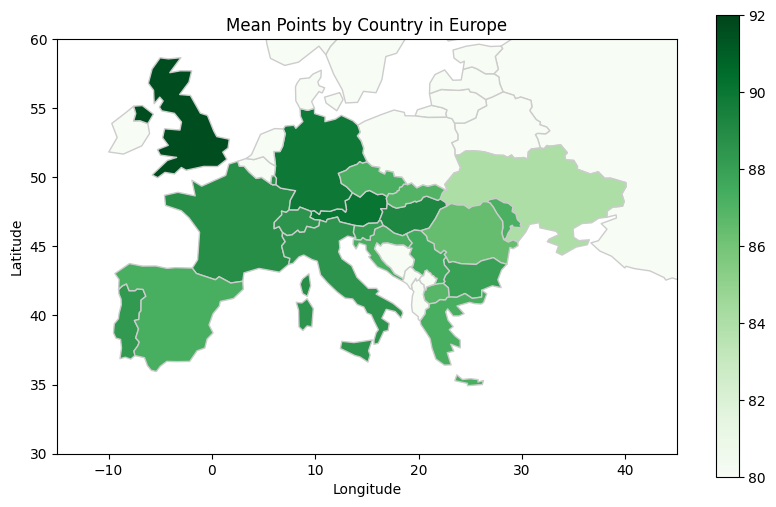

In [15]:
# Load a GeoDataFrame containing the boundaries of European countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the DataFrame to include only European countries
europe = world[world['continent'] == 'Europe']

# Merge the mean points with the European countries GeoDataFrame
europe_with_mean_points = europe.merge(mean_points, how='left', left_on='name', right_on='country')

# Define the minimum and maximum quality values
min_points = 80
max_points = 92

# Set the colormap
cmap = cm.get_cmap('Greens')

# Normalize the quality values
norm = Normalize(vmin=min_points, vmax=max_points)

# Plot the map with mean points
fig, ax = plt.subplots(figsize=(10, 6))
europe_with_mean_points.plot(column='points', cmap=cmap, norm=norm, edgecolor='0.8', legend=True, ax=ax)
ax.set_title('Mean Points by Country in Europe')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Define the limits for latitude and longitude
lat_min, lat_max = 30, 60
lon_min, lon_max = -15, 45

# Set the limits for the x-axis (longitude) and y-axis (latitude)
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

plt.show()

In [16]:
sorted_europe = europe_with_mean_points.sort_values(by='points', ascending=False)

# Display the sorted DataFrame
display(sorted_europe)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,points
28,66834405.0,Europe,United Kingdom,GBR,2829108,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",United Kingdom,91.581081
7,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Austria,90.101345
14,83132799.0,Europe,Germany,DEU,3861123,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",Germany,89.851732
8,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024...",Hungary,89.191781
2,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",France,88.845109
20,619896.0,Europe,Luxembourg,LUX,71104,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...",Luxembourg,88.666667
19,8574832.0,Europe,Switzerland,CHE,703082,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...",Switzerland,88.571429
26,60297396.0,Europe,Italy,ITA,2003576,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...",Italy,88.562231
23,10269417.0,Europe,Portugal,PRT,238785,"POLYGON ((-9.03482 41.88057, -8.67195 42.13469...",Portugal,88.250220
30,2087946.0,Europe,Slovenia,SVN,54174,"POLYGON ((13.80648 46.50931, 14.63247 46.43182...",Slovenia,88.068966


Then the Wordcloud of 'description' column is created in order to see what are the most common descriptions of wine taste. We delete unnecessary words which don't describe well the wine features, but are most popular in the figure.
After this preliminary check we create the same Wordclouds for wines which have >= 95 points (best wines in dataset) and are between 80 and 85 points (worst wines in dataset). Then we compare them and make a conclusion that best wines are more tannin, concentrated and comlex, while worse wines are softer and more sweet.

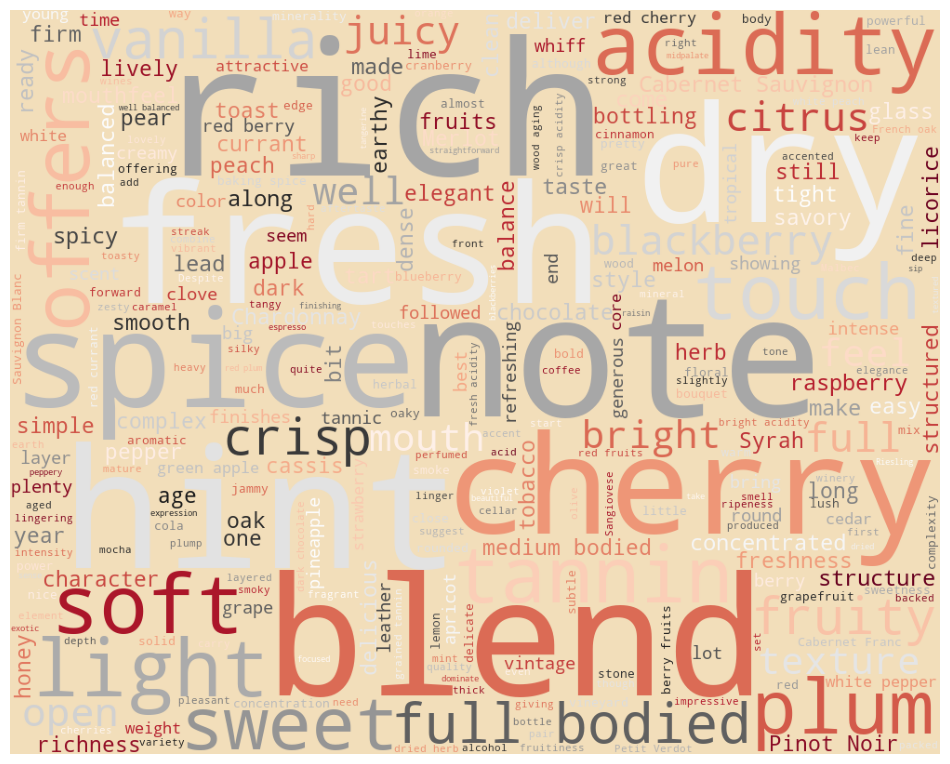

In [183]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "black", 'wine', 'drink', 'finish', 'nose', 'show', 'now', 'ripe', 'aroma', 'flavor', 'flavors', 'palate', 'aromas', 'give', 'gives', 'shows', 'ofter', 'yet', 'offer']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    colormap='RdGy',
    background_color='#F2DEBA',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(wine_df['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [191]:
# Filter the rows where 'points' column equals 100
filtered_df = wine_df[wine_df['points'] >= 95]

filtered_df1 = wine_df[(wine_df['points'] >= 80) & (wine_df['points'] <= 85)]

# Display the filtered DataFrame
display(filtered_df)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
345,345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
346,346,Australia,"This deep brown wine smells like a damp, mossy...",Rare,98,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards
347,347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",Kiedrich Gräfenberg Trockenbeerenauslese,97,775.0,Rheingau,NaN,NaN,Anna Lee C. Iijima,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil
348,348,Australia,Deep mahogany. Dried fig and black tea on the ...,Grand,97,100.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Grand Muscat (R...,Muscat,Chambers Rosewood Vineyards
349,349,Australia,"RunRig is always complex, and the 2012 doesn't...",RunRig,97,225.0,South Australia,Barossa,NaN,Joe Czerwinski,@JoeCz,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128271,128271,Spain,"Concentrated to the hilt, with molten black fr...",Old Vines Unfiltered,96,82.0,Northern Spain,Rioja,NaN,Michael Schachner,@wineschach,Remírez de Ganuza 2005 Old Vines Unfiltered (...,Tempranillo Blend,Remírez de Ganuza
128681,128681,France,"A Blanc de Blancs, from 100% Chardonnay, Deutz...",Amour de Deutz Brut,95,NaN,Champagne,Champagne,NaN,Roger Voss,@vossroger,Deutz 1999 Amour de Deutz Brut Chardonnay (Cha...,Chardonnay,Deutz
128682,128682,United States of America,Easy to like a lot now for its terrifically ri...,Dutton Ranch Karmen Isabella,95,38.0,California,Russian River Valley,Sonoma,NaN,NaN,Dutton Estate 2007 Dutton Ranch Karmen Isabell...,Pinot Noir,Dutton Estate
128683,128683,United States of America,"Big, powerful, soft, rich and ageable. In othe...",Heirloom Estate Grown,95,90.0,California,Carneros,Napa-Sonoma,NaN,NaN,Etude 2006 Heirloom Estate Grown Pinot Noir (C...,Pinot Noir,Etude


In [ ]:
filtered_df1 = wine_df[(wine_df['points'] >= 80) & (wine_df['points'] <= 85)]

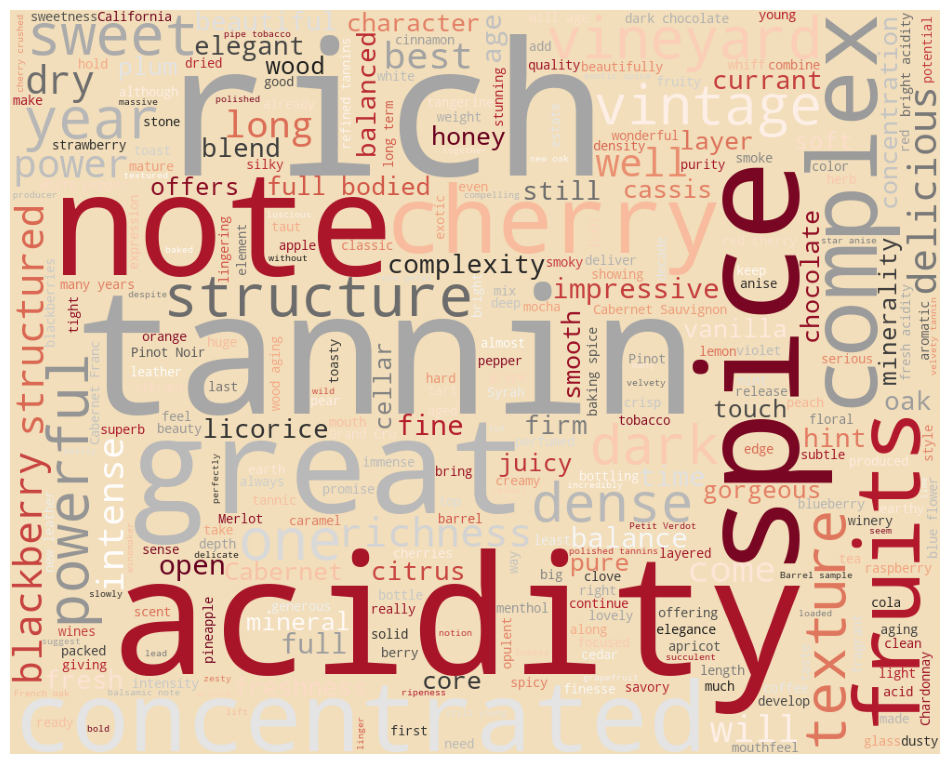

In [185]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "black", 'wine', 'drink', 'finish', 'nose', 'show', 'now', 'ripe', 'aroma', 'flavor', 'flavors', 'palate', 'aromas', 'give', 'gives', 'shows', 'ofter', 'yet', 'offer']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    colormap='RdGy',
    background_color='#F2DEBA',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(filtered_df['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


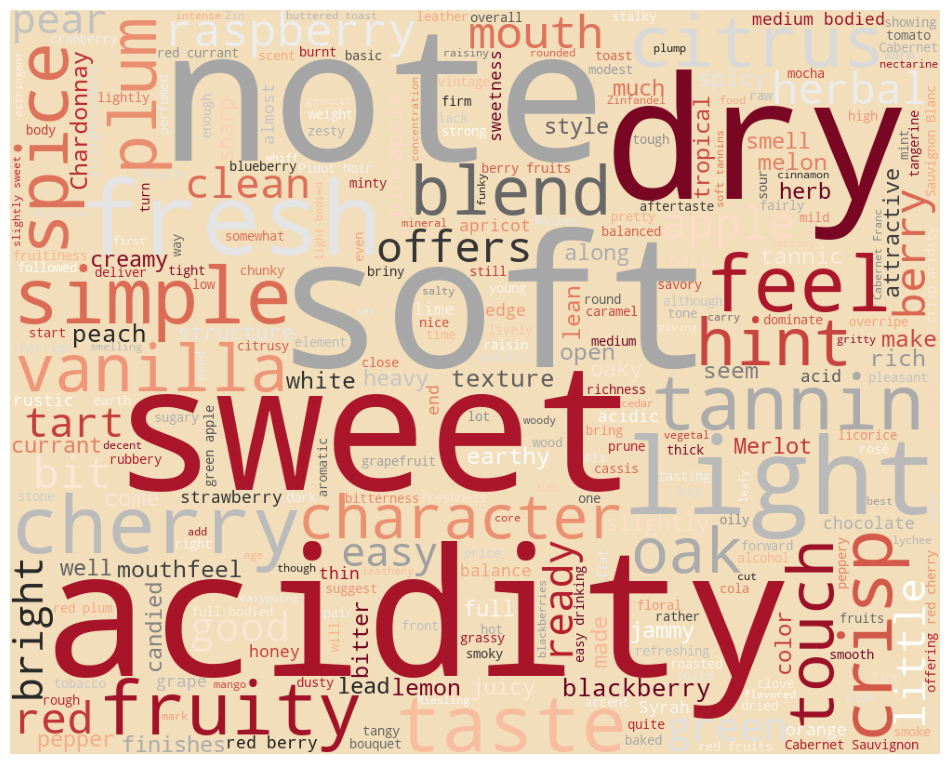

In [192]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "black", 'wine', 'drink', 'finish', 'nose', 'show', 'now', 'ripe', 'aroma', 'flavor', 'flavors', 'palate', 'aromas', 'give', 'gives', 'shows', 'ofter', 'yet', 'offer']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    colormap='RdGy',
    background_color='#F2DEBA',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(filtered_df1['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The next code creates mean points for each wine variety. After sorting it creates output with best sorts of wine and their countries of origin.

In [17]:
# Group the DataFrame by 'variety' and calculate the mean points for each group
mean_points_per_variety = wine_df.groupby('variety')['points'].mean()

# Assuming 'mean_points_per_variety' is your Series containing mean points for each variety
# Sort the mean points in descending order
mean_points_sorted = mean_points_per_variety.sort_values(ascending=False)

# Slice the first 30 values
mean_points_top30 = mean_points_sorted.head(30)

# Display the mean points for each variety
print(mean_points_top30)

variety
Terrantez                    95.000000
Tinta del Pais               95.000000
Gelber Traminer              95.000000
Bual                         94.142857
Sercial                      94.000000
Riesling-Chardonnay          94.000000
Ramisco                      93.000000
Garnacha-Cariñena            93.000000
Blauburgunder                93.000000
Muscadelle                   92.500000
Rosenmuskateller             92.500000
Roviello                     92.500000
Sirica                       92.500000
Torontel                     92.000000
Caprettone                   92.000000
Moscato di Noto              92.000000
Centesimino                  92.000000
Sauvignon Blanc-Assyrtiko    92.000000
Vespaiolo                    92.000000
Chardonnay Weissburgunder    92.000000
Pignolo                      92.000000
Tinta Negra Mole             92.000000
Babosa Negro                 92.000000
Kotsifali                    92.000000
Malbec-Cabernet              91.666667
Chardonnay-Albari

In [18]:
# Group the DataFrame by 'variety' and 'country', and calculate the mean points for each group
mean_points_per_variety_country = wine_df.groupby(['variety', 'country'])['points'].mean().reset_index()

# Calculate the mean points for each variety
mean_points_per_variety = mean_points_per_variety_country.groupby('variety')['points'].mean()

# Get the top 30 varieties based on mean points
top_varieties = mean_points_per_variety.nlargest(10).index

# Filter the DataFrame to include only the top 30 varieties
top_varieties_df = mean_points_per_variety_country[mean_points_per_variety_country['variety'].isin(top_varieties)]

# Pivot the filtered DataFrame to have 'variety' as rows, 'country' as columns, and 'points' as values
pivot_table = top_varieties_df.pivot_table(index='variety', columns='country', values='points', fill_value=0)

# Sort the DataFrame along the rows axis (varieties) based on mean points for each variety
pivot_table_sorted = pivot_table.loc[pivot_table.mean(axis=1).sort_values(ascending=False).index]

# Display the sorted pivot table
print(pivot_table_sorted)

country              Austria   Portugal  Spain  United States of America
variety                                                                 
Gelber Traminer         95.0   0.000000    0.0                       0.0
Terrantez                0.0  95.000000    0.0                       0.0
Tinta del Pais           0.0   0.000000   95.0                       0.0
Bual                     0.0  94.142857    0.0                       0.0
Riesling-Chardonnay      0.0   0.000000    0.0                      94.0
Sercial                  0.0  94.000000    0.0                       0.0
Blauburgunder           93.0   0.000000    0.0                       0.0
Garnacha-Cariñena        0.0   0.000000   93.0                       0.0
Ramisco                  0.0  93.000000    0.0                       0.0
Rosenmuskateller        92.5   0.000000    0.0                       0.0
